Optimization terminated successfully.
         Current function value: 0.420160
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Binary_Choice   No. Observations:                  567
Model:                          Logit   Df Residuals:                      562
Method:                           MLE   Df Model:                            4
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:                  0.3051
Time:                        18:32:57   Log-Likelihood:                -238.23
converged:                       True   LL-Null:                       -342.82
Covariance Type:            nonrobust   LLR p-value:                 4.011e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1843      1.133     -3.693      0.000      -6.405      -1.964
PRE_MW     -3.467e-07   8.28e

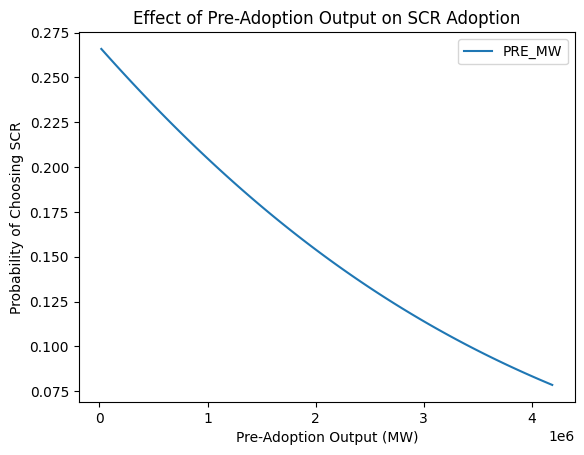

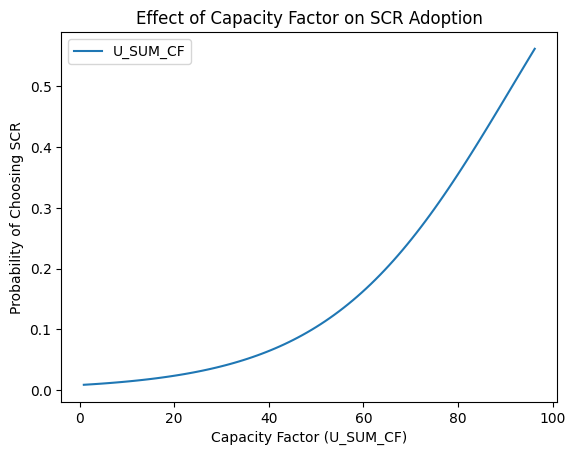

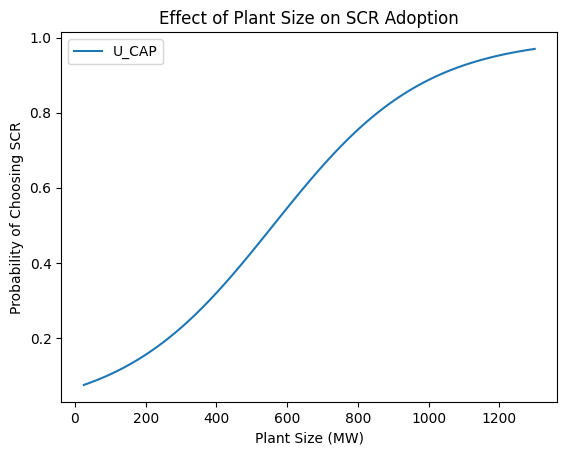

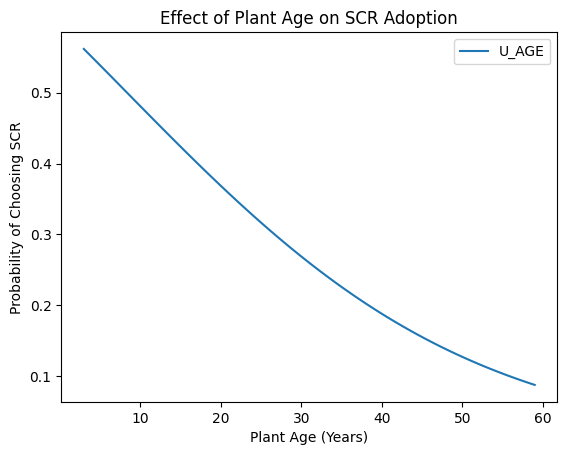

In [5]:
# pooled analysis
import pandas as pd
import numpy as np
from statsmodels.api import Logit
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Load and Prepare the Data
data = pd.read_csv("https://raw.githubusercontent.com/fhc-smt/SMT/main/merged_data.csv")

# Create a binary dependent variable for SCR adoption (1 if SCR, 0 otherwise)
data['Binary_Choice'] = data['D_SCR']  # Assuming D_SCR is the dummy for SCR adoption

# Define Predictors: Pre-adoption output, capacity factor, plant size, and age
X = data[['PRE_MW', 'U_SUM_CF', 'U_CAP', 'U_AGE']]  # Independent variables
y = data['Binary_Choice']  # Dependent variable

# Add a constant term for the intercept
X = sm.add_constant(X)

# Step 2: Estimate Logistic Regression
model = Logit(y, X)
result = model.fit()

# Step 3: Display Model Summary
print(result.summary())

# Step 4: Marginal Effects
# Calculate marginal effects to understand the influence of each predictor
marginal_effects = result.get_margeff()
print(marginal_effects.summary())

# Step 5: Visualization - Effect of Each Predictor on SCR Adoption Probability
# Define helper function to calculate probabilities for a range of values
def calculate_probabilities(variable, variable_name, fixed_values, model):
    values = np.linspace(data[variable_name].min(), data[variable_name].max(), 100)
    probabilities = []

    for value in values:
        predictors = fixed_values.copy()
        predictors[variable_name] = value
        pred = model.predict(pd.DataFrame(predictors, index=[0]))
        probabilities.append(pred.values[0])

    return values, probabilities

# Fixed values for predictors (hold others constant)
fixed_values = {
    'const': 1,
    'PRE_MW': data['PRE_MW'].mean(),
    'U_SUM_CF': data['U_SUM_CF'].mean(),
    'U_CAP': data['U_CAP'].mean(),
    'U_AGE': data['U_AGE'].mean()
}

# Visualize Effect of Pre-Adoption Output (PRE_MW)
pre_mw_values, pre_mw_probabilities = calculate_probabilities('PRE_MW', 'PRE_MW', fixed_values, result)
plt.plot(pre_mw_values, pre_mw_probabilities, label='PRE_MW')
plt.xlabel('Pre-Adoption Output (MW)')
plt.ylabel('Probability of Choosing SCR')
plt.title('Effect of Pre-Adoption Output on SCR Adoption')
plt.legend()
plt.show()

# Visualize Effect of Capacity Factor (U_SUM_CF)
cf_values, cf_probabilities = calculate_probabilities('U_SUM_CF', 'U_SUM_CF', fixed_values, result)
plt.plot(cf_values, cf_probabilities, label='U_SUM_CF')
plt.xlabel('Capacity Factor (U_SUM_CF)')
plt.ylabel('Probability of Choosing SCR')
plt.title('Effect of Capacity Factor on SCR Adoption')
plt.legend()
plt.show()

# Visualize Effect of Plant Size (U_CAP)
cap_values, cap_probabilities = calculate_probabilities('U_CAP', 'U_CAP', fixed_values, result)
plt.plot(cap_values, cap_probabilities, label='U_CAP')
plt.xlabel('Plant Size (MW)')
plt.ylabel('Probability of Choosing SCR')
plt.title('Effect of Plant Size on SCR Adoption')
plt.legend()
plt.show()

# Visualize Effect of Plant Age (U_AGE)
age_values, age_probabilities = calculate_probabilities('U_AGE', 'U_AGE', fixed_values, result)
plt.plot(age_values, age_probabilities, label='U_AGE')
plt.xlabel('Plant Age (Years)')
plt.ylabel('Probability of Choosing SCR')
plt.title('Effect of Plant Age on SCR Adoption')
plt.legend()
plt.show()

In [17]:
# Get the number of rows
num_rows = data.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 567


the total number of units became 567 after incorporating the variable: pre-adoption output (PRE_MW)

Adoption Counts by Regime:
          SCR  SNCR  LN  CM  No Retrofit
Regime 2   94    11  30  29          105
Regime 3   43     0  11   2           48
Regime 1   29    31  29  11           94


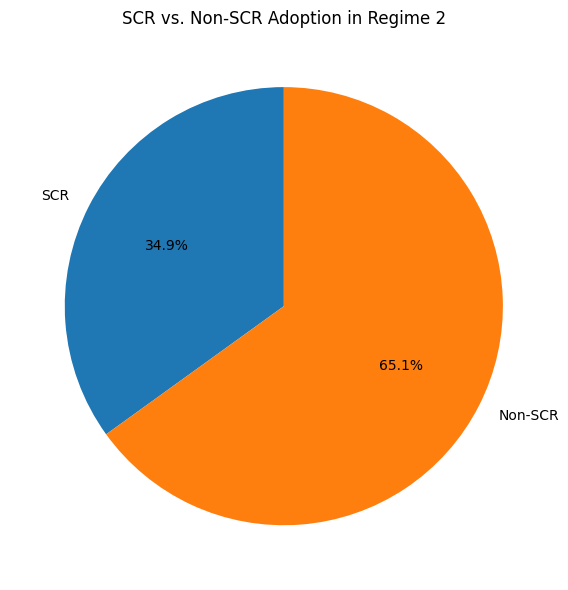

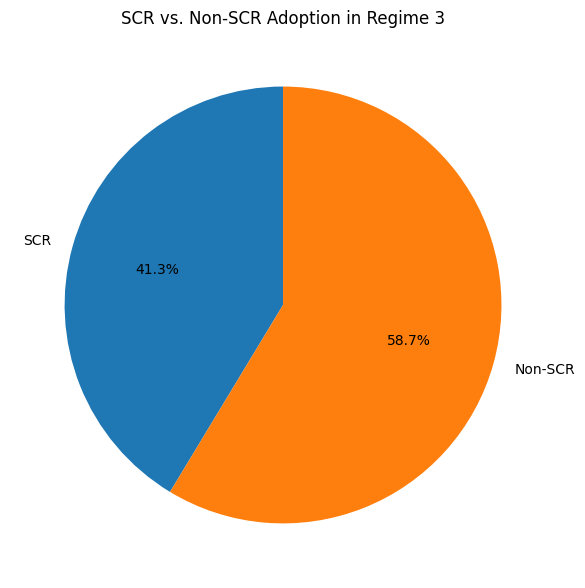

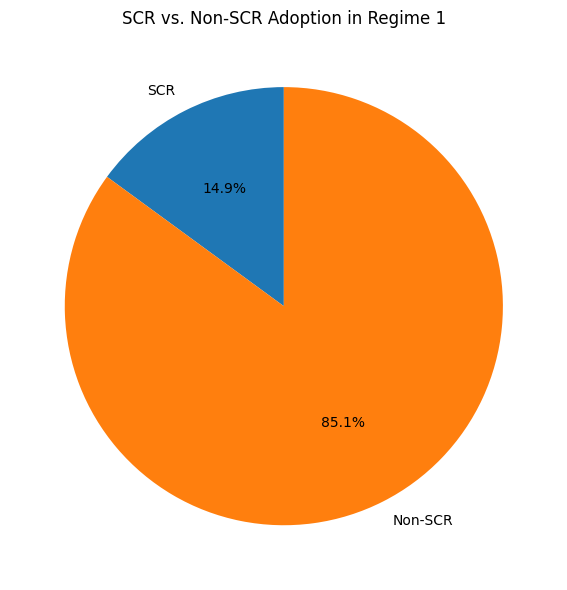

In [18]:
import pandas as pd


# Define a function to count technology adoption by regime
def count_adoption_by_regime(data, regime_col='REGIME', tech_cols=None):
    if tech_cols is None:
        tech_cols = ['D_SCR', 'D_SNCR', 'D_LN', 'D_CM', 'D_NO']  # Technology dummy columns

    # Create an empty dictionary to store results
    adoption_counts = {}

    # Loop through each regime
    for regime in data[regime_col].unique():
        regime_data = data[data[regime_col] == regime]
        counts = regime_data[tech_cols].sum()  # Sum the dummy columns for each technology
        adoption_counts[f'Regime {regime}'] = counts

    # Convert to a DataFrame for easier visualization
    adoption_df = pd.DataFrame(adoption_counts).T
    adoption_df.columns = ['SCR', 'SNCR', 'LN', 'CM', 'No Retrofit']
    return adoption_df

# Count adoption for each regime
adoption_counts = count_adoption_by_regime(data)

# Display the results
print("Adoption Counts by Regime:")
print(adoption_counts)

# Optional: Save to a CSV file
adoption_counts.to_csv("adoption_counts_by_regime.csv", index=True)

import matplotlib.pyplot as plt

# Function to plot pie charts for SCR vs. Non-SCR adoption
def plot_scr_vs_non_scr(data):
    for regime in data.index:
        # Create a new DataFrame for SCR and Non-SCR
        scr_non_scr = pd.Series({
            'SCR': data.loc[regime]['SCR'],
            'Non-SCR': data.loc[regime].sum() - data.loc[regime]['SCR']
        })

        plt.figure(figsize=(6, 6))
        scr_non_scr.plot(
            kind='pie',
            autopct='%1.1f%%',
            startangle=90,
            legend=False
        )
        plt.title(f"SCR vs. Non-SCR Adoption in {regime}")
        plt.ylabel('')  # Remove y-axis label for better aesthetics
        plt.tight_layout()
        plt.show()

# Example usage (replace `adoption_counts` with your DataFrame)
plot_scr_vs_non_scr(adoption_counts)



In [6]:
# Segmented Analysis
import pandas as pd
from statsmodels.api import Logit
import statsmodels.api as sm

# Step 2: Segment the Data by Regime
deregulated_data = data[data['REGIME'] == 1]
regulated_data = data[data['REGIME'] == 2]
public_data = data[data['REGIME'] == 3]

# Define a function to train a logistic regression model and make predictions
def regime_analysis(subset, regime_name):
    print(f"Processing {regime_name} Regime...")

    # Predictors and dependent variable
    X = subset[['PRE_MW', 'U_SUM_CF', 'U_CAP', 'U_AGE']]
    y = subset['D_SCR']  # Binary outcome: 1 = SCR, 0 = No SCR

    # Add a constant term for the intercept
    X = sm.add_constant(X)

    # Train the logistic regression model
    model = Logit(y, X)
    result = model.fit()
    print(result.summary())

    # Make predictions
    subset['Predicted_Prob'] = result.predict(X)  # Predicted probabilities
    subset['Predicted_SCR'] = (subset['Predicted_Prob'] >= 0.5).astype(int)  # Binary predictions

    # Summarize predictions
    predicted_count = subset['Predicted_SCR'].sum()  # Count predicted SCR
    actual_count = subset['D_SCR'].sum()  # Count actual SCR

    print(f"\n{regime_name} Regime:")
    print(f"Predicted SCR Adoption: {predicted_count}")
    print(f"Actual SCR Adoption: {actual_count}")
    print(f"Prediction Accuracy: {(subset['Predicted_SCR'] == subset['D_SCR']).mean():.2%}")

    return subset

# Step 3: Perform Analysis for Each Regime
deregulated_results = regime_analysis(deregulated_data, "Deregulated")
regulated_results = regime_analysis(regulated_data, "Regulated")
public_results = regime_analysis(public_data, "Public")

# Step 4: Aggregate Results
total_predicted = deregulated_results['Predicted_SCR'].sum() + \
                  regulated_results['Predicted_SCR'].sum() + \
                  public_results['Predicted_SCR'].sum()
total_actual = data['D_SCR'].sum()

print(f"\nOverall Results:")
print(f"Total Predicted SCR Adoption: {total_predicted}")
print(f"Total Actual SCR Adoption: {total_actual}")

overall_accuracy = (
    (deregulated_results['Predicted_SCR'] == deregulated_results['D_SCR']).mean() +
    (regulated_results['Predicted_SCR'] == regulated_results['D_SCR']).mean() +
    (public_results['Predicted_SCR'] == public_results['D_SCR']).mean()
) / 3
print(f"Overall Prediction Accuracy: {overall_accuracy:.2%}")


Processing Deregulated Regime...
Optimization terminated successfully.
         Current function value: 0.314148
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  D_SCR   No. Observations:                  194
Model:                          Logit   Df Residuals:                      189
Method:                           MLE   Df Model:                            4
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:                  0.2552
Time:                        18:34:03   Log-Likelihood:                -60.945
converged:                       True   LL-Null:                       -81.832
Covariance Type:            nonrobust   LLR p-value:                 1.858e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3940      2.293     -1.480      0.139      -7.887       1.

<ipython-input-6-594660dd4d9b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Predicted_Prob'] = result.predict(X)  # Predicted probabilities
<ipython-input-6-594660dd4d9b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Predicted_SCR'] = (subset['Predicted_Prob'] >= 0.5).astype(int)  # Binary predictions
<ipython-input-6-594660dd4d9b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



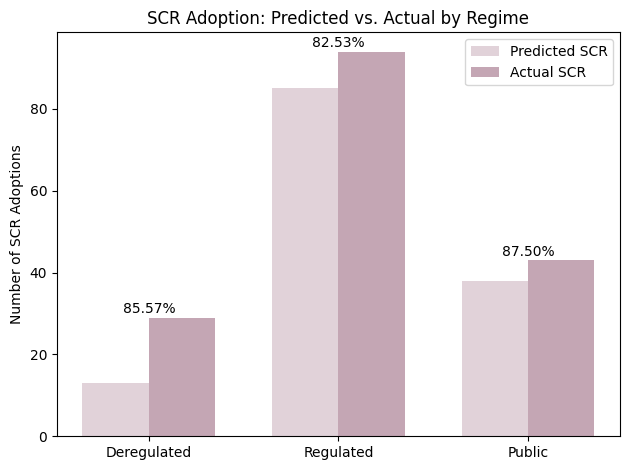

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Data for the regimes
regimes = ['Deregulated', 'Regulated', 'Public']
predicted_scr = [13, 85, 38]
actual_scr = [29, 94, 43]
accuracy = [85.57, 82.53, 87.5]

# Create bar chart
x = np.arange(len(regimes))  # the label locations
width = 0.35  # the width of the bars
actual_scr_color = '#c4a6b4'
predicted_scr_color = mcolors.to_rgba(actual_scr_color, alpha=0.5)

fig, ax1 = plt.subplots()

rects1 = ax1.bar(x - width/2, predicted_scr, width, label='Predicted SCR', color=predicted_scr_color)
rects2 = ax1.bar(x + width/2, actual_scr, width, label='Actual SCR', color=actual_scr_color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Number of SCR Adoptions')
ax1.set_title('SCR Adoption: Predicted vs. Actual by Regime')
ax1.set_xticks(x)
ax1.set_xticklabels(regimes)
ax1.legend()

# Add accuracy as text above bars
for i, v in enumerate(accuracy):
    ax1.text(x[i], max(predicted_scr[i], actual_scr[i]) + 1, f"{v:.2f}%", ha='center', color='black')

# Display the plot
plt.tight_layout()
plt.show()

Why is the accuracy for deregulated units so high? Due to class imbalance, the accuracy refers to Non-SCR units